In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# II. 2 Distribuciones de Masa de Probabilidad Habituales

## La Distribución de Bernoulli

Está asociada a la ocurrencia de un evento $A$ con probabilidad $p=P(A)$, construyéndose la variable aleatoria $X$ asignando el valor $1$ cuando $A$ acontece y $0$ cuando no lo hace. Modela la probabilidad de acierto de un suceso. Por tanto, la función de masa de probailidad es:

$$
\begin{array}{c|cc|c}
X & 0 & 1\\
\hline
p_X(x_i) & q=1-p & p=P(A) & \sum_i p_X(x_i) = 1
\end{array}
$$

Podemos dar una forma funcional, haciendo además explícita en la definición la dependencia con el parámetro $p$:

$$Bernoulli(p) \equiv p_X(x_i;p)=p^{x_i}(1-p)^{1-x_i} \qquad x_i \in \{0,1\}$$

Podemos calcular fácilmente los principales estadísticos de la distribución:

$$\begin{align*}
\eta_X = E(X) &= 0(1-p)+1p &= p\\
E(X^2) &= 0^2(1-p)+1^2p &= p\\
\sigma_X^2=Var(X) &= E(X^2)-\eta_X^2 = p-p^2 &= p(1-p)
\end{align*}$$

En el lanzamiento de una moneda, tal vez trucada, el suceso "sacar cara" (igualmente sería "cruz") se modela con una distribución de Bernoulli, siendo $P(cara)=p$.  

Probabilidad de acertar: p =  0.70 
Probabilidad de fallar:  q = 1-p =  0.30


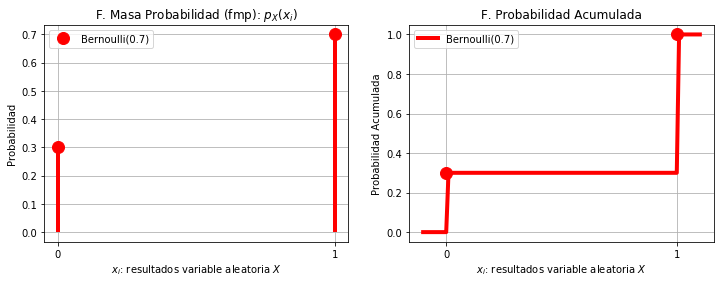

In [2]:
bernoulli = stats.bernoulli
p = .7
print('Probabilidad de acertar: p = % 1.2f' %p, 
      '\nProbabilidad de fallar:  q = 1-p = % 1.2f' %(1-p))

plt.figure(figsize=(12,4))

# Visualizar Función de Masa de Probabilidad (FMP)
plt.subplot(1,2,1)
x = [0, 1]
plt.plot(x, bernoulli.pmf(x, p), 'ro', ms=12, mec='r', label='Bernoulli(0.7)')
plt.vlines(x, 0, bernoulli.pmf(x, p), colors='r', lw=4), plt.grid()
plt.legend(loc='best', frameon=True) 
plt.title(r'F. Masa Probabilidad (fmp): $p_X(x_i)$')
plt.xlabel(r'$x_i$: resultados variable aleatoria $X$'), plt.ylabel('Probabilidad')
ax = plt.gca() 
ax.set_xticks(x)


# Visualizar Función de Distribución de Probabilidad (FDP)
plt.subplot(1,2,2), 
step_x = .01 
xx = np.arange(-10*step_x,1+10*step_x,step_x)
plt.plot(xx, bernoulli.cdf(xx, p), 'r', lw=4, label='Bernoulli(0.7)'), 
plt.plot(x, bernoulli.cdf(x, p), 'ro', ms=12, mec='r')
plt.grid()
plt.legend(loc='best', frameon=True), plt.title('F. Probabilidad Acumulada'),
plt.xlabel(r'$x_i$: resultados variable aleatoria $X$'), plt.ylabel('Probabilidad Acumulada')
ax = plt.gca() 
ax.set_xticks([0,1])
plt.show()

In [3]:
print('Bernoulli(0.7):')
print('\t','Media:', bernoulli(p).mean())
print('\t','Varianza:', bernoulli(p).var())
print('\t','Valor Cuadrático Medio:', bernoulli(p).moment(2))
print('\nEjemplo de realización (100 repeticiones):')
seq = bernoulli.rvs(p, loc=0, size=100, random_state=None)
print(seq)
print('\nEstimaciones:')
print('Probabilidades: ', np.bincount(seq)/100)
print('Media: ', seq.mean(), 
      '\nVarianza: ', (seq.std())**2)

Bernoulli(0.7):
	 Media: 0.7
	 Varianza: 0.21000000000000002
	 Valor Cuadrático Medio: 0.7

Ejemplo de realización (100 repeticiones):
[0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0]

Estimaciones:
Probabilidades:  [0.35 0.65]
Media:  0.65 
Varianza:  0.2275


## La Distribución Binomial

Consideremos la repetición de $n$ experimentos de Bernoulli independientes. La distribución binomial modela la probabilidad de que el suceso $A$ acontezca $x_i$ veces en los $n$ intentos:

$$B(n,p)\equiv p_X(x_i; n,p) = \binom{n}{x_i}p^{x_i}(1-p)^{n-x_i} \qquad n \in \mathbb{N} \quad x_i \in \{0,1 \ldots n\}$$

Considerando que una variable aleatoria binomial puede considerarse suma de $n$ variables de Bernoulli independientes, se demuestra (se verá cuando se vean varias variables aleatorias conjuntas) que la media y la varianza son:

$$\begin{align*}
\eta_X = E(X) &= np\\
\sigma_X^2=Var(X) &= np(1-p)
\end{align*}$$

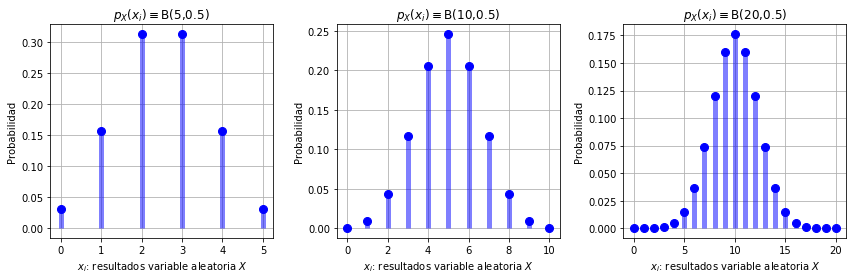

In [4]:
binom = stats.binom

plt.figure(figsize=(12,4))

# Visualizar Función de Masa de Probabilidad (FMP)
n, p = 5, .5
plt.subplot(1,3,1)
k = np.arange(n+1)
plt.plot(k, binom.pmf(k, n, p), 'bo', ms=8, label='FMP Binomial')
plt.vlines(k, 0, binom.pmf(k, n, p), colors='b', lw=5, alpha=0.5), plt.grid()
#plt.legend(loc='best', frameon=True)
plt.title(r'$p_X(x_i) \equiv $B(5,0.5)')
plt.xlabel(r'$x_i$: resultados variable aleatoria $X$'), plt.ylabel('Probabilidad')
#ax = plt.gca() 
#ax.set_xticks(k)

# Visualizar Función de Masa de Probabilidad (FMP)
n, p = 10, .5
plt.subplot(1,3,2)
k = np.arange(n+1)
plt.plot(k, binom.pmf(k, n, p), 'bo', ms=8, label='FMP Binomial')
plt.vlines(k, 0, binom.pmf(k, n, p), colors='b', lw=5, alpha=0.5), plt.grid()
#plt.legend(loc='best', frameon=True) 
plt.title(r'$p_X(x_i) \equiv $B(10,0.5)')
plt.xlabel(r'$x_i$: resultados variable aleatoria $X$'), plt.ylabel('Probabilidad')
#ax = plt.gca() 
#ax.set_xticks(k)

# Visualizar Función de Masa de Probabilidad (FMP)
n, p = 20, .5
plt.subplot(1,3,3)
k = np.arange(n+1)
plt.plot(k, binom.pmf(k, n, p), 'bo', ms=8, label='FMP Binomial')
plt.vlines(k, 0, binom.pmf(k, n, p), colors='b', lw=5, alpha=0.5), plt.grid()
#plt.legend(loc='best', frameon=True)
plt.title(r'$p_X(x_i) \equiv $B(20,0.5)')
plt.xlabel(r'$x_i$: resultados variable aleatoria $X$'), plt.ylabel('Probabilidad')
#ax = plt.gca() 
#ax.set_xticks(k)

plt.tight_layout()

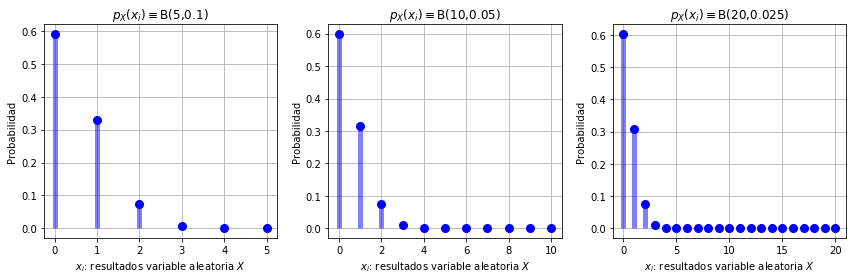

In [5]:
plt.figure(figsize=(12,4))

# Visualizar Función de Masa de Probabilidad (FMP)
n, p = 5, .1
plt.subplot(1,3,1)
k = np.arange(n+1)
plt.plot(k, binom.pmf(k, n, p), 'bo', ms=8, label='FMP Binomial')
plt.vlines(k, 0, binom.pmf(k, n, p), colors='b', lw=5, alpha=0.5), plt.grid()
#plt.legend(loc='best', frameon=True)
plt.title(r'$p_X(x_i) \equiv $B(5,0.1)')
plt.xlabel(r'$x_i$: resultados variable aleatoria $X$'), plt.ylabel('Probabilidad')
#ax = plt.gca() 
#ax.set_xticks(k)

# Visualizar Función de Masa de Probabilidad (FMP)
n, p = 10, .05
plt.subplot(1,3,2)
k = np.arange(n+1)
plt.plot(k, binom.pmf(k, n, p), 'bo', ms=8, label='FMP Binomial')
plt.vlines(k, 0, binom.pmf(k, n, p), colors='b', lw=5, alpha=0.5), plt.grid()
#plt.legend(loc='best', frameon=True) 
plt.title(r'$p_X(x_i) \equiv $B(10,0.05)')
plt.xlabel(r'$x_i$: resultados variable aleatoria $X$'), plt.ylabel('Probabilidad')
#ax = plt.gca() 
#ax.set_xticks(k)

# Visualizar Función de Masa de Probabilidad (FMP)
n, p = 20, .025
plt.subplot(1,3,3)
k = np.arange(n+1)
plt.plot(k, binom.pmf(k, n, p), 'bo', ms=8, label='FMP Binomial')
plt.vlines(k, 0, binom.pmf(k, n, p), colors='b', lw=5, alpha=0.5), plt.grid()
#plt.legend(loc='best', frameon=True)
plt.title(r'$p_X(x_i) \equiv $B(20,0.025)')
plt.xlabel(r'$x_i$: resultados variable aleatoria $X$'), plt.ylabel('Probabilidad')
#ax = plt.gca() 
#ax.set_xticks(k)

plt.tight_layout()

In [6]:
n, p = 5, .5
print('B(',n,',',p,'):\n',
      '\tMedia: ',binom(n,p).mean(),
      '\tVarianza: ',binom(n,p).var())

n, p = 10, .5
print('B(',n,',',p,'):\n',
      '\tMedia: ',binom(n,p).mean(),
      '\tVarianza: ',binom(n,p).var())

n, p = 20, .5
print('B(',n,',',p,'):\n',
      '\tMedia: ',binom(n,p).mean(),
      '\tVarianza: ',binom(n,p).var())

n, p = 5, .1
print('B(',n,',',p,'):\n',
      '\tMedia: ',binom(n,p).mean(),
      '\tVarianza: ',binom(n,p).var())

n, p = 10, .05
print('B(',n,',',p,'):\n',
      '\tMedia: ',binom(n,p).mean(),
      '\tVarianza: ',binom(n,p).var())

n, p = 20, .025
print('B(',n,',',p,'):\n',
      '\tMedia: ',binom(n,p).mean(),
      '\tVarianza: ',binom(n,p).var())

B( 5 , 0.5 ):
 	Media:  2.5 	Varianza:  1.25
B( 10 , 0.5 ):
 	Media:  5.0 	Varianza:  2.5
B( 20 , 0.5 ):
 	Media:  10.0 	Varianza:  5.0
B( 5 , 0.1 ):
 	Media:  0.5 	Varianza:  0.45
B( 10 , 0.05 ):
 	Media:  0.5 	Varianza:  0.475
B( 20 , 0.025 ):
 	Media:  0.5 	Varianza:  0.4875


## La Distribución Poisson

La función de masa de probabilidad de la distribución de Poisson es:

$$Pois(\lambda)\equiv p_X(x_i;\lambda) = e^{-\lambda}\frac{\lambda^k}{k!}$$

Esta distribución surge cuando se hacen crecer el número de repeticiones de una distribución Binomial, de modo que la probabilidad de éxito se hace muy pequeña pero el producto de tal probabilidad y el número de repeticiones se mantiene constante:

$$n \rightarrow \infty \begin{cases}
    p \rightarrow 0\\
    np \rightarrow \lambda
  \end{cases} \implies B(n,p) \rightarrow Pois(\lambda)$$
  
El valor medio y la varianza resultan ser: $\eta_X=\sigma_X^2=\lambda$

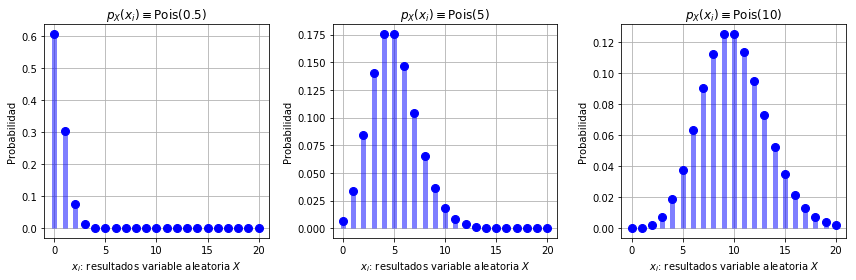

In [7]:
poisson = stats.poisson

plt.figure(figsize=(12,4))

# Visualizar Función de Masa de Probabilidad (FMP)
n, lda = 20, .5
plt.subplot(1,3,1)
k = np.arange(n+1)
plt.plot(k, poisson.pmf(k, lda), 'bo', ms=8, label='FMP Poisson')
plt.vlines(k, 0, poisson.pmf(k, lda), colors='b', lw=5, alpha=0.5), plt.grid()
#plt.legend(loc='best', frameon=True)
plt.title(r'$p_X(x_i) \equiv $Pois(0.5)')
plt.xlabel(r'$x_i$: resultados variable aleatoria $X$'), plt.ylabel('Probabilidad')
#ax = plt.gca() 
#ax.set_xticks(k)

# Visualizar Función de Masa de Probabilidad (FMP)
n, lda = 20, 5
plt.subplot(1,3,2)
k = np.arange(n+1)
plt.plot(k, poisson.pmf(k, lda), 'bo', ms=8, label='FMP Poisson')
plt.vlines(k, 0, poisson.pmf(k, lda), colors='b', lw=5, alpha=0.5), plt.grid()
#plt.legend(loc='best', frameon=True) 
plt.title(r'$p_X(x_i) \equiv $Pois(5)')
plt.xlabel(r'$x_i$: resultados variable aleatoria $X$'), plt.ylabel('Probabilidad')
#ax = plt.gca() 
#ax.set_xticks(k)

# Visualizar Función de Masa de Probabilidad (FMP)
n, lda = 20, 10
plt.subplot(1,3,3)
k = np.arange(n+1)
plt.plot(k, poisson.pmf(k, lda), 'bo', ms=8, label='FMP Poisson')
plt.vlines(k, 0, poisson.pmf(k, lda), colors='b', lw=5, alpha=0.5), plt.grid()
#plt.legend(loc='best', frameon=True)
plt.title(r'$p_X(x_i) \equiv $Pois(10)')
plt.xlabel(r'$x_i$: resultados variable aleatoria $X$'), plt.ylabel('Probabilidad')
#ax = plt.gca() 
#ax.set_xticks(k)

plt.tight_layout()

Los **procesos puntuales de Poisson** son importantes en la práctica. Considérese un intervalo de longitud $\Delta$ en el que se resaltan puntos de forma totalmente aleatoria con una densidad o tasa de llegada de $r$. El promedio de puntos que surgirán en el mismo es $\lambda = r\Delta$. El intervalo podría ser también una porción del plano o del espacio, con una interpretación semejante para los puntos.

* El número de puntos en dos subintervalos disjuntos es independiente, por la aleatoriedad en su surgimiento o llegada.
* El número de puntos del intervalo tiene una distribución $Pois(r\Delta)$
* Como se verá más adelante, si el intervalo es lineal, el periodo de espera hasta el siguiente punto sigue una distribución exponencial


## Distribuciones Multinoulli y Uniforme

Se trata de la distribución genérica de una variable aleatoria discreta que puede tomar $N$ valores posibles. Un ejemplo es el dado trucado visto anteriormente, en el que $N=6$ y cada cara tiene una probabilidad $p_X(x_i)$, con $x_i \in \{1, \ldots 6\}$.

* Un caso particular es cuando $N=2$, $x_i \in \{0,1\}$, que corresponde a la distribución de Bernoulli.
* La **distribución uniforme** es el caso particular en que la variable aleatoria toma valores entre $a$ y $b$, todos con igual probabilidad.  Esto es:

$$U(a,b)\equiv p_X(x_i;a,b)=1/N \qquad a < b \in \mathbb{Z} \qquad N=b-a+1$$  

$$\eta_X = \frac{a+b}{2}$$

$$\sigma_X^2 = \frac{(b-a+1)^2-1}{12}$$


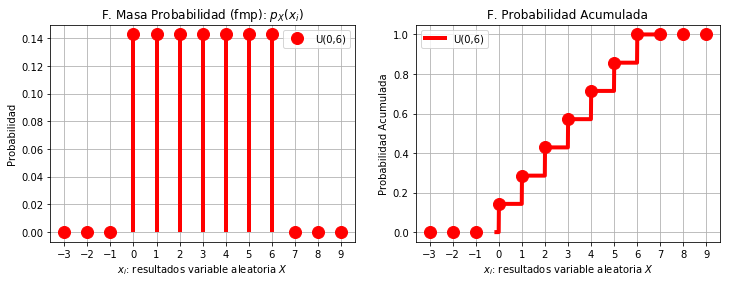

In [8]:
randint = stats.randint

a, b = 0, 6

plt.figure(figsize=(12,4))

# Visualizar Función de Masa de Probabilidad (FMP)
plt.subplot(1,2,1)
x = np.arange(a-3, b+4)
plt.plot(x, randint.pmf(x, a, b+1), 'ro', ms=12, mec='r', label='U(0,6)')
plt.vlines(x, 0, randint.pmf(x, a, b+1), colors='r', lw=4), plt.grid()
plt.legend(loc='best', frameon=True) 
plt.title(r'F. Masa Probabilidad (fmp): $p_X(x_i)$')
plt.xlabel(r'$x_i$: resultados variable aleatoria $X$'), plt.ylabel('Probabilidad')
ax = plt.gca() 
ax.set_xticks(x)


# Visualizar Función de Distribución de Probabilidad (FDP)
plt.subplot(1,2,2), 
step_x = .01 
xx = np.arange(a-10*step_x,b+1+10*step_x,step_x)
plt.plot(xx, randint.cdf(xx, a, b+1), 'r', lw=4, label='U(0,6)'), 
plt.plot(x, randint.cdf(x, a, b+1), 'ro', ms=12, mec='r')
plt.grid()
plt.legend(loc='best', frameon=True), plt.title('F. Probabilidad Acumulada'),
plt.xlabel(r'$x_i$: resultados variable aleatoria $X$'), plt.ylabel('Probabilidad Acumulada')
ax = plt.gca() 
ax.set_xticks(x)
plt.show()

## Verosimilitud versus Bayes

Hemos visto varias distribuciones que dependen de parámteros. Cada valor de tales parámetros determina una distribución diferente. La variación de tales distribuciones es continua con tales parámetros:

* Bernoulli(p)
* Binom(n, p)
* Poisson($\lambda$)
* U(a,b)

Un parámetro $k$ discreto también podría indexar distribuciones totalmente diferentes. Por ejemplo, $k \in \{1,2,3\}$ indicaría tres distribuciones distintas.

A la vista de observaciones provenientes de alguna distribución parameterizada según se ha indicado, ¿podemos infererir cuál es la distribución que las ha generado? En otras palabras, ¿cuáles son los parámetros?

Consideremos que la distribución se parametriza como $p_X(x_i; \theta)$.

La **función de verosimilitud** corresponde a la función de masa de probabilidad evaluada en la observación, dejando variar el parámetro que consideramos **determinista y desconocido**:

$$L(\theta) = p_X(x_i; \theta)$$

**Alternativamente**, puede pensarse que $\theta$ es una **variable aleatoria**. En tal caso consideraremos las probabilidad de masa condicionada de la observación por el parámetro:
$$p_X(x_i/\theta)$$

Tenemos dos opciones para determinar el parámetro $\theta$ y, con ello, la distribución que ha generado las observaciones:

* **MLE**: Principio de **máxima verosimilitud**: buscamos el valor de $\theta$ que maximiza la versomilitud $L(\theta)$
* **MAP**: Principio de **máximo a posteriori**: *si disponemos de la distribución a priori* del parámetro $\theta$ (de momento sólo consideramos una variable aleaotoria discreta) podemos utilizar el **Teorema de Bayes** para obtener la probabilidad a posteriori del parámetro dadas las observaciones, que será la función a maximizar:

$$p_X(\theta/x_i) = \frac{p_X(x_i/\theta)p_\theta(\theta)}{\sum p_X(x_i/\theta_j)p_\theta(\theta_j)}$$

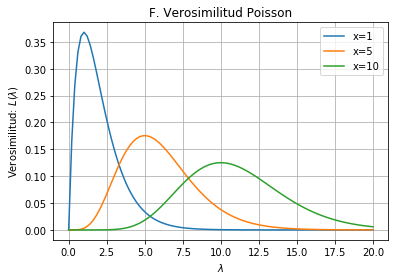

In [9]:
pp = np.linspace(0,20,100,endpoint=True)

plt.plot(pp, poisson.pmf(1, pp), label='x=1')
plt.plot(pp, poisson.pmf(5, pp), label='x=5')
plt.plot(pp, poisson.pmf(10, pp), label='x=10')
plt.grid()
plt.legend(loc='best', frameon=True), plt.title('F. Verosimilitud Poisson'),
plt.xlabel(r'$\lambda$'), plt.ylabel(r'Verosimilitud: $L(\lambda)$')
ax = plt.gca() 
#ax.set_xticks(k);

### Ejemplo

Un sensor debe detectar dos tipos de radiaciones, ambas emitiendo fotones conforme a una distribución de Poisson. La fuente 1 tiene $\lambda_1 = 5$ y la fuente 2 tiene $\lambda_2 = 10$. Se miden 7 fotones. 

* ¿Qué fuente debemos elegir? 
* ¿Y si sabemos que las fuentes tienen una probabilidad priori $p_F(1)=1/3$ y $p_F(2)=2/3$?
* ¿Cuáles deben ser las reglas de decisión MLE y MAP?
* ¿Cuáles son las probabilidades de error y de acierto en cada caso?